<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/student_t_for_chap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import datetime
import pytz # time zone
from tabulate import tabulate
from google.colab import files


In [ ]:
def CI_sumulation(Num_of_interval, Sample_size, pop_mean, pop_std, CI_range):
  #generate population
  population = np.random.normal(pop_mean,pop_std,1000)
  intervals =[]
  Sample_data = []
  for sample in range(Num_of_interval):
    sample = np.random.choice(a= population, size = Sample_size)
    sample_mean = sample.mean()
    Sample_data.append(sample)
    t_critical = stats.t.ppf((1-CI_range)/2+CI_range,Sample_size)  # Get the t-critical value*         

    margin_of_error = t_critical * (np.std(sample)/math.sqrt(Sample_size))# get marginal error
    
    confidence_interval = (sample_mean - margin_of_error,sample_mean,sample_mean) 

    intervals.append(confidence_interval)

  plt.figure(figsize=(20,10))

  #record data
  top_data = []
  mean_data = []
  bot_data = []
  pass_fail = []
  Fail = 0 #count the fail times
  for i in range(Num_of_interval):
    (top,mean,bot)= intervals[i]
    top_data.append(top)
    mean_data.append(mean)
    bot_data.append(bot)

    if abs(mean-pop_mean)>abs(top-mean):
      plt.errorbar(i, mean, yerr=top-mean, fmt='o',color='red')
      Fail = Fail+1
      pass_fail.append('Fail')
    else:
      plt.errorbar(i, mean, yerr=top-mean, fmt='o',color='blue')
      pass_fail.append('Pass')

  plt.hlines(xmin=0, xmax=Num_of_interval,y=0, linewidth=2.0,color="red")
  plt.title('#Interval = '+str(Num_of_interval)+', Fail = '+str(Fail)+' Confidence Interval = '+'{:.0%}'.format(CI_range),fontsize=16)
  plt.suptitle('Confidence Interval Simulation',fontsize=24)
  plt.xlabel('Sample Number', fontsize = 16)
  plt.ylabel('Mean', fontsize = 16)
  return Sample_data,top_data,mean_data,bot_data,pass_fail


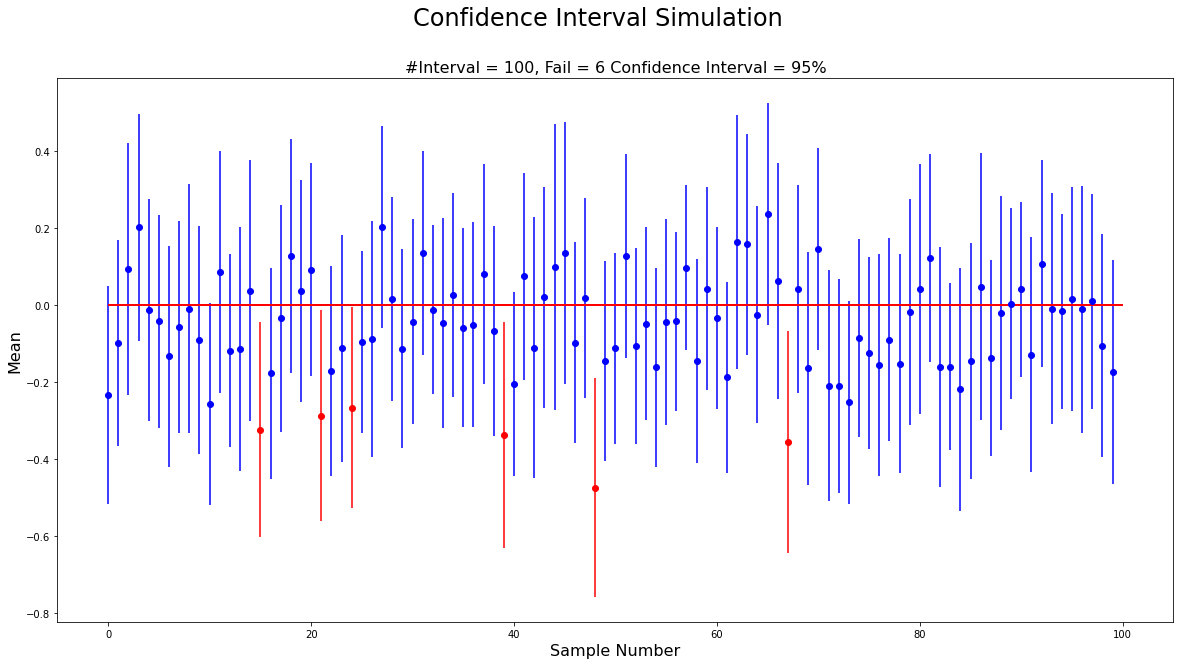

In [ ]:
#create 100 random samples
#each sample has 50 random numbers
#population mean of 0
#standard deviation of 1
#95% confidence interval
test_data,top_data,mean_data,bot_data,pass_fail = CI_sumulation(100, 50, 0, 1, 0.95)

In [ ]:
#print data set used in above graph
#last 4 columns creates interval and indicates if it contains population mean
test_data = pd.DataFrame(test_data)
test_data.insert(50, "bottom",bot_data , True) 
test_data.insert(51, "mean",mean_data , True) 
test_data.insert(52, "top",top_data , True) 
test_data.insert(53, "result",pass_fail , True) 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Data for 95% Confidence Interval")
print("")
print(tabulate(test_data,headers=test_data.columns,tablefmt="github",showindex=False))

Data for 95% Confidence Interval

|           0 |          1 |           2 |           3 |           4 |           5 |           6 |          7 |           8 |           9 |          10 |         11 |         12 |          13 |         14 |          15 |          16 |          17 |          18 |          19 |          20 |         21 |          22 |          23 |          24 |         25 |         26 |          27 |          28 |         29 |          30 |          31 |          32 |          33 |         34 |          35 |          36 |          37 |         38 |          39 |          40 |          41 |         42 |          43 |         44 |          45 |          46 |         47 |          48 |         49 |      bottom |        mean |        top | result   |
|-------------|------------|-------------|-------------|-------------|-------------|-------------|------------|-------------|-------------|-------------|------------|------------|-------------|------------|-------------|-------

In [ ]:
tz_NY = pytz.timezone('America/New_York') 
datetime_NY = datetime.datetime.now(tz_NY)
start = datetime.datetime.now()
print("NY time:", datetime_NY.strftime("%H:%M:%S.%f"))
print("Saving CI_95Percent data to 'Download' folder") 

test_data.to_csv('Chapter10_CI_95Percent.csv')
files.download('Chapter10_CI_95Percent.csv')

datetime_NY = datetime.datetime.now(tz_NY)
print("NY time:", datetime_NY.strftime("%H:%M:%S.%f"))
print("Finish saving CI_95Percent data to 'Download' folder")
print("Process time:" + str(datetime.datetime.now() - start))

NY time: 14:32:40.929024
Saving CI_95Percent data to 'Download' folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NY time: 14:32:41.020793
Finish saving CI_95Percent data to 'Download' folder
Process time:0:00:00.091971


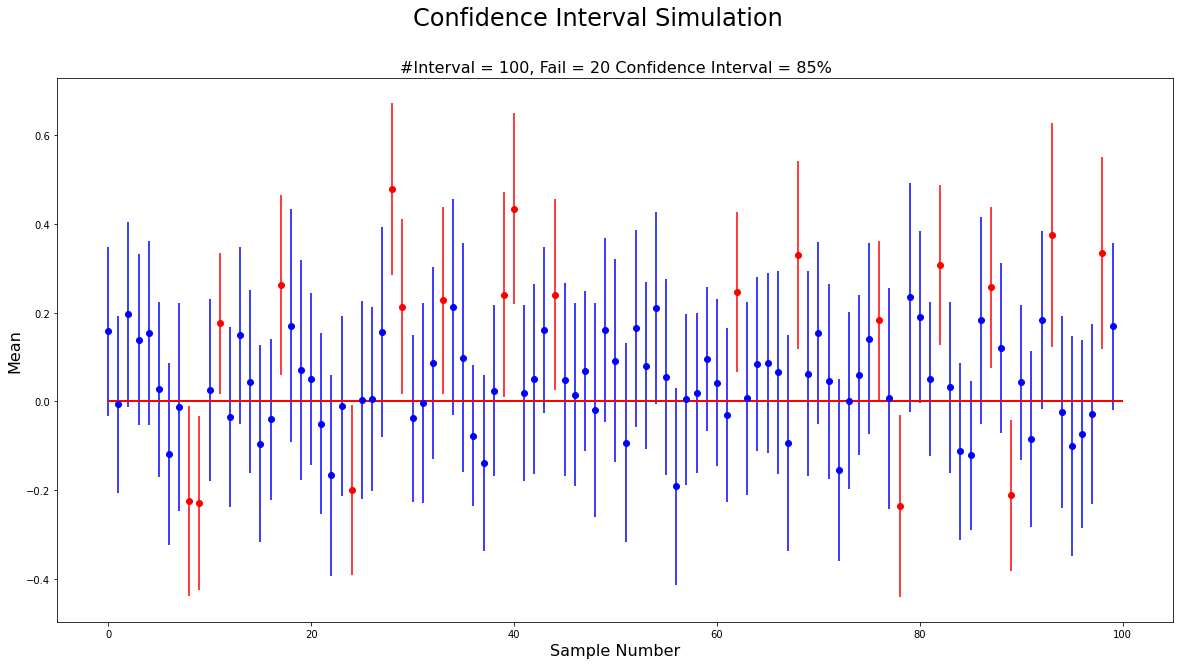

In [ ]:
#create 100 random samples
#each sample has 50 random numbers
#population mean of 0
#standard deviation of 1
#85% confidence interval
test_data,top_data,mean_data,bot_data,pass_fail = CI_sumulation(100, 50, 0, 1, 0.85)

In [ ]:
#print data set used in above graph
#last 4 columns creates interval and indicates if it contains population mean
test_data = pd.DataFrame(test_data)
test_data.insert(50, "bottom",bot_data , True) 
test_data.insert(51, "mean",mean_data , True) 
test_data.insert(52, "top",top_data , True) 
test_data.insert(53, "result",pass_fail , True) 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Data for 85% Confidence Interval")
print("")
print(tabulate(test_data,headers=test_data.columns,tablefmt="github",showindex=False))

Data for 85% Confidence Interval

|           0 |          1 |          2 |           3 |          4 |          5 |           6 |          7 |          8 |          9 |         10 |         11 |          12 |          13 |         14 |          15 |          16 |         17 |          18 |         19 |          20 |          21 |         22 |         23 |         24 |         25 |          26 |         27 |         28 |          29 |          30 |         31 |         32 |          33 |         34 |         35 |          36 |         37 |          38 |          39 |         40 |         41 |          42 |         43 |         44 |         45 |          46 |         47 |         48 |          49 |      bottom |        mean |         top | result   |
|-------------|------------|------------|-------------|------------|------------|-------------|------------|------------|------------|------------|------------|-------------|-------------|------------|-------------|-------------|------------

In [ ]:
tz_NY = pytz.timezone('America/New_York') 
datetime_NY = datetime.datetime.now(tz_NY)
start = datetime.datetime.now()
print("NY time:", datetime_NY.strftime("%H:%M:%S.%f"))
print("Saving CI_85Percent data to 'Download' folder") 

test_data.to_csv('Chapter10_CI_85Percent.csv')
files.download('Chapter10_CI_85Percent.csv')

datetime_NY = datetime.datetime.now(tz_NY)
print("NY time:", datetime_NY.strftime("%H:%M:%S.%f"))
print("Finish saving CI_85Percent data to 'Download' folder")
print("Process time:" + str(datetime.datetime.now() - start))

NY time: 14:32:57.212872
Saving CI_85Percent data to 'Download' folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NY time: 14:32:57.237670
Finish saving CI_85Percent data to 'Download' folder
Process time:0:00:00.025529


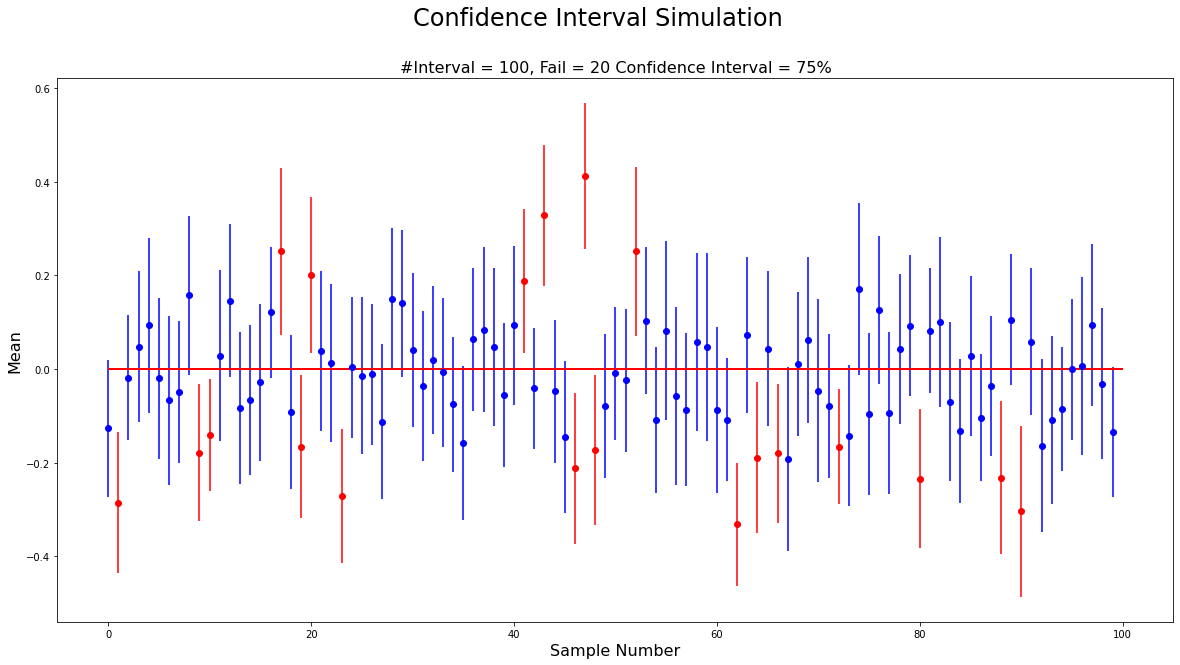

In [ ]:
#create 100 random samples
#each sample has 50 random numbers
#75% confidence interval
test_data,top_data,mean_data,bot_data,pass_fail = CI_sumulation(100, 50, 0, 1, 0.75)

In [ ]:
#print data set used in above graph
#last 4 columns creates interval and indicates if it contains population mean
test_data = pd.DataFrame(test_data)
test_data.insert(50, "bottom",bot_data , True) 
test_data.insert(51, "mean",mean_data , True) 
test_data.insert(52, "top",top_data , True) 
test_data.insert(53, "result",pass_fail , True) 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Data for 75% Confidence Interval")
print("")
print(tabulate(test_data,headers=test_data.columns,tablefmt="github",showindex=False))

Data for 75% Confidence Interval

|           0 |            1 |          2 |           3 |          4 |           5 |           6 |          7 |          8 |          9 |          10 |          11 |         12 |         13 |         14 |         15 |         16 |          17 |         18 |         19 |          20 |          21 |          22 |         23 |           24 |          25 |         26 |          27 |          28 |           29 |          30 |         31 |          32 |           33 |         34 |          35 |          36 |         37 |         38 |         39 |         40 |         41 |         42 |         43 |          44 |          45 |         46 |          47 |         48 |         49 |       bottom |         mean |         top | result   |
|-------------|--------------|------------|-------------|------------|-------------|-------------|------------|------------|------------|-------------|-------------|------------|------------|------------|------------|------------|-

In [ ]:
tz_NY = pytz.timezone('America/New_York') 
datetime_NY = datetime.datetime.now(tz_NY)
start = datetime.datetime.now()
print("NY time:", datetime_NY.strftime("%H:%M:%S.%f"))
print("Saving CI_75Percent data to 'Download' folder") 

test_data.to_csv('Chapter10_CI_75Percent.csv')
files.download('Chapter10_CI_75Percent.csv')

datetime_NY = datetime.datetime.now(tz_NY)
print("NY time:", datetime_NY.strftime("%H:%M:%S.%f"))
print("Finish saving CI_75Percent data to 'Download' folder")
print("Process time:" + str(datetime.datetime.now() - start))

NY time: 14:33:56.380351
Saving CI_75Percent data to 'Download' folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NY time: 14:33:56.404498
Finish saving CI_75Percent data to 'Download' folder
Process time:0:00:00.025011
